In [1]:
# Importing required libraries 

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import recall_score,f1_score,precision_score,multilabel_confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler,label_binarize
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None) # display all columns without compression

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
accepted_df = pd.read_csv('final_cleaned_accepted.csv',index_col='Unnamed: 0')

In [5]:
accepted_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,10,1,55000.0,0,5,0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,4981.0,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.000000,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,2003,8,2015,12,2019,3,2019,1
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,10,1,65000.0,0,5,0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,18005.0,6472.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.000000,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,1999,12,2015,12,2019,3,2016,6
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,10,1,63000.0,0,5,0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,10827.0,2081.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.000000,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,0,2000,8,2015,12,2019,3,2017,6
3,35000.0,35000.0,35000.0,60,14.85,829.90,C,10,1,110000.0,1,1,0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,1,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,0,0.0,0.0,301500.0,12609.0,6987.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,7.084087,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,0,0,0,2008,9,2015,12,2019,3,2019,2
4,10400.0,10400.0,10400.0,60,22.45,289.91,F,3,1,104433.0,1,5,0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,73839.0,9702.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.000000,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,0,0,1998,6,2015,12,2018,3,2016,7


In [6]:
y = accepted_df['grade'] # target column
accepted_df.drop(columns='grade',inplace=True)

In [7]:
# seperating features and target columns

features = ['funded_amnt_inv',
     'int_rate',
     'emp_length',
     'annual_inc',
     'pymnt_plan',
     'dti',
     'deling_2yrs',
     'fico_range_low',
     'ing_last_6mths',
     'open_acc',
     'pub_rec',
     'revol_bal',
     'revol_util',
     'total_acc',
     'initial_list_status',
     'total_rec_late_fee',
     'last_pymnt_amnt',
     'last_fico_range_high',
     'last_fico_range_low',
     'collections_12_mths_ex_med',
     'policy_code',
     'application_type',
     'acc_now_dealing',
     'tot_coll_amt',
     'tot_cur_bal',
     'total_bal_il',
     'max_bal_bc',
     'issue_d_month',
     'earliest_cr_line_month',
     'earliest_cr_line_year',
     'last_pymnt_d_month',
     'last_credit_pull_d_month',
     'last_credit_pull_d_year']

In [8]:
X = accepted_df[features]

In [9]:
# mmscaler = MinMaxScaler()
ss = StandardScaler()
X = ss.fit_transform(X)

In [10]:
# splitting 90% of data into training data and 10% to validation and test data
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,random_state=1,test_size=0.1)
# splitting test and validation data equally
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,random_state=1,test_size=0.5)

###  Regularized Logistic Regression baseline model

In [11]:
lormodel = LogisticRegression(n_jobs=4) 
lormodel.fit(X_train,y_train)
lormodel.score(X_val,y_val)

0.8674632919446074

In [12]:
from sklearn.model_selection import GridSearchCV
lor=LogisticRegression(max_iter=100, random_state=10,n_jobs=4)

Grid_l= { 'C': [1e-4,1e-3,1e-2,0.1] } 

grid_search = GridSearchCV(lor, param_grid=Grid_l)

grid_search.fit(X_train, y_train)

result = grid_search.cv_results_
estimator = grid_search.best_estimator_
score = grid_search.best_score_
params = grid_search.best_params_

print('result', result)
print('best score', score)
print('best params', params)

result {'mean_fit_time': array([ 96.62390237, 179.60655394, 120.67307744, 105.52812328]), 'std_fit_time': array([23.88371582, 15.77969053, 15.94181193,  5.53151933]), 'mean_score_time': array([0.66822543, 0.73777738, 0.41174316, 0.39866157]), 'std_score_time': array([0.15140993, 0.08686244, 0.04216718, 0.02405164]), 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}], 'split0_test_score': array([0.7740406 , 0.85972325, 0.86709911, 0.86646398]), 'split1_test_score': array([0.77475796, 0.85868731, 0.8662344 , 0.86579257]), 'split2_test_score': array([0.77437135, 0.85954336, 0.86706008, 0.86636419]), 'split3_test_score': array([0.7731922 , 0.85721821, 0.86509668, 0.86466037]), 'split4_test_score': array([0.77337998, 0.85882262, 0.86646913, 0.86560479]), 'mean_test_score': array([0.77394842, 0.85879895, 0.86639188, 0.8657771

## **Summary**
#### - _Baseline Logistic Regression model is performing well then tuning different set of C values_

__Calculating precision, recall and F1 score using baseline model on test data__

In [13]:
precision = round(precision_score(y_test,lormodel.predict(X_test),average='weighted'),4)
recall = round(recall_score(y_test,lormodel.predict(X_test),average='weighted'),4)
f1 = round(f1_score(y_test,lormodel.predict(X_test),average='weighted'),4)
print('precision:',precision)
print('recall:',recall)
print('f1 score',f1)

precision: 0.8642
recall: 0.8663
f1 score 0.865


In [14]:
multilabel_confusion_matrix(y_test,lormodel.predict(X_test))

array([[[79161,  1508],
        [ 1026, 18896]],

       [[68282,  2782],
        [ 3458, 26069]],

       [[68419,  3498],
        [ 2882, 25792]],

       [[83294,  2956],
        [ 2540, 11801]],

       [[92925,  1855],
        [ 2224,  3587]],

       [[98098,   696],
        [  972,   825]],

       [[99923,   149],
        [  342,   177]]], dtype=int64)

#### _Confusion matrix plot_

<AxesSubplot:title={'center':'Confusion matrix for class F'}>

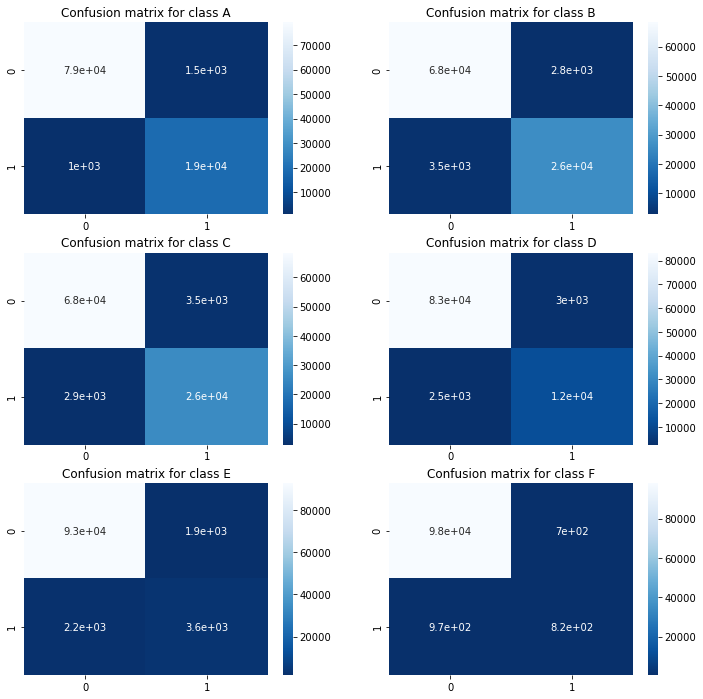

In [15]:
fig, axes = plt.subplots(3,2,figsize=(12,12))

axes[0,0].set_title('Confusion matrix for class A')
sns.heatmap(multilabel_confusion_matrix(y_test,lormodel.predict(X_test))[0],annot=True,cmap='Blues_r',ax=axes[0,0])

axes[0,1].set_title('Confusion matrix for class B')
sns.heatmap(multilabel_confusion_matrix(y_test,lormodel.predict(X_test))[1],annot=True,cmap='Blues_r',ax=axes[0,1])

axes[1,0].set_title('Confusion matrix for class C')
sns.heatmap(multilabel_confusion_matrix(y_test,lormodel.predict(X_test))[2],annot=True,cmap='Blues_r',ax=axes[1,0])

axes[1,1].set_title('Confusion matrix for class D')
sns.heatmap(multilabel_confusion_matrix(y_test,lormodel.predict(X_test))[3],annot=True,cmap='Blues_r',ax=axes[1,1])

axes[2,0].set_title('Confusion matrix for class E')
sns.heatmap(multilabel_confusion_matrix(y_test,lormodel.predict(X_test))[4],annot=True,cmap='Blues_r',ax=axes[2,0])

axes[2,1].set_title('Confusion matrix for class F')
sns.heatmap(multilabel_confusion_matrix(y_test,lormodel.predict(X_test))[5],annot=True,cmap='Blues_r',ax=axes[2,1])

### Random Forest Classifier baseline model

In [16]:
rfc = RandomForestClassifier(bootstrap=True,random_state=9,warm_start=True,n_jobs=4)
rfc.fit(X_train,y_train)
rfc.score(X_val,y_val)

0.9430167708840751

In [17]:
rfc.score(X_test,y_test)

0.9425296497698601

In [18]:
from sklearn.model_selection import GridSearchCV
rfcmodel =  RandomForestClassifier(bootstrap=True,random_state=9,warm_start=True,n_jobs=4)

Grid_l= { 'max_depth': [3,4,5,6] } 

grid_search = GridSearchCV(rfcmodel, param_grid=Grid_l)

grid_search.fit(X_train, y_train)

result = grid_search.cv_results_
estimator = grid_search.best_estimator_
score = grid_search.best_score_
params = grid_search.best_params_

print('result', result)
print('best score', score)
print('best params', params)

result {'mean_fit_time': array([ 80.11442599, 125.00061536, 124.43224812, 139.06558747]), 'std_fit_time': array([10.87209848,  8.61824458,  7.33289995,  1.93836136]), 'mean_score_time': array([2.24598479, 3.15055289, 2.26087842, 2.24985337]), 'std_score_time': array([0.57202635, 0.29662701, 0.14299348, 0.04293014]), 'param_max_depth': masked_array(data=[3, 4, 5, 6],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}], 'split0_test_score': array([0.68577046, 0.7043192 , 0.71980824, 0.77933984]), 'split1_test_score': array([0.68459597, 0.70121173, 0.71909501, 0.79946759]), 'split2_test_score': array([0.68605679, 0.7036584 , 0.72224309, 0.79999227]), 'split3_test_score': array([0.68551278, 0.70312267, 0.71861175, 0.77518875]), 'split4_test_score': array([0.68472576, 0.70247372, 0.71542778, 0.78723704]), 'mean_test_score': array([0.68533235, 0.70295715, 0.7190371

In [19]:
rfcmodel1 =  RandomForestClassifier(bootstrap=True,random_state=9,warm_start=True,n_jobs=4,max_depth=6)
rfcmodel1.fit(X_train,y_train)
rfcmodel1.score(X_val,y_val)

0.779642313924705

## **Summary**
#### - _Baseline Random Forest Classifier model is performing well then tuning max_depth values_

__Calculating precision, recall and F1 score using baseline model on test data__

In [20]:
precision = round(precision_score(y_test,rfc.predict(X_test),average='weighted'),4)
recall = round(recall_score(y_test,rfc.predict(X_test),average='weighted'),4)
f1 = round(f1_score(y_test,rfc.predict(X_test),average='weighted'),4)
print('precision:',precision)
print('recall:',recall)
print('f1 score',f1)

precision: 0.9429
recall: 0.9425
f1 score 0.9418


In [21]:
multilabel_confusion_matrix(y_test,rfc.predict(X_test))

array([[[ 80581,     88],
        [   259,  19663]],

       [[ 70149,    915],
        [  1674,  27853]],

       [[ 69830,   2087],
        [  1208,  27466]],

       [[ 84689,   1561],
        [   739,  13602]],

       [[ 93897,    883],
        [  1043,   4768]],

       [[ 98553,    241],
        [   558,   1239]],

       [[100066,      6],
        [   300,    219]]], dtype=int64)

#### _Confusion matrix plot_

<AxesSubplot:title={'center':'Confusion matrix for class F'}>

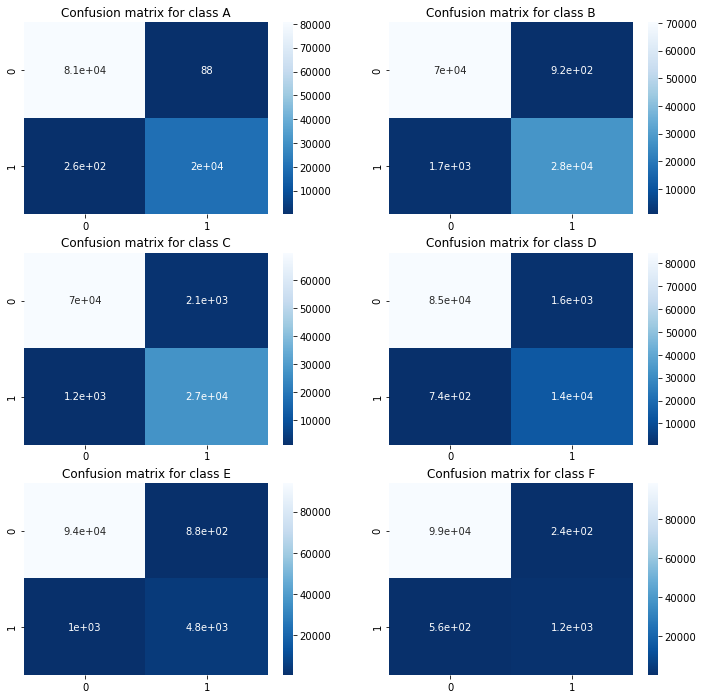

In [22]:
fig, axes = plt.subplots(3,2,figsize=(12,12))

axes[0,0].set_title('Confusion matrix for class A')
sns.heatmap(multilabel_confusion_matrix(y_test,rfc.predict(X_test))[0],annot=True,cmap='Blues_r',ax=axes[0,0])

axes[0,1].set_title('Confusion matrix for class B')
sns.heatmap(multilabel_confusion_matrix(y_test,rfc.predict(X_test))[1],annot=True,cmap='Blues_r',ax=axes[0,1])

axes[1,0].set_title('Confusion matrix for class C')
sns.heatmap(multilabel_confusion_matrix(y_test,rfc.predict(X_test))[2],annot=True,cmap='Blues_r',ax=axes[1,0])

axes[1,1].set_title('Confusion matrix for class D')
sns.heatmap(multilabel_confusion_matrix(y_test,rfc.predict(X_test))[3],annot=True,cmap='Blues_r',ax=axes[1,1])

axes[2,0].set_title('Confusion matrix for class E')
sns.heatmap(multilabel_confusion_matrix(y_test,rfc.predict(X_test))[4],annot=True,cmap='Blues_r',ax=axes[2,0])

axes[2,1].set_title('Confusion matrix for class F')
sns.heatmap(multilabel_confusion_matrix(y_test,rfc.predict(X_test))[5],annot=True,cmap='Blues_r',ax=axes[2,1])

### Calculating AUC score

#### Regularized Logistic Regression

In [23]:
y_score1 = lormodel.predict_proba(X_test)

In [24]:
print(roc_auc_score(y_test,y_score1,multi_class='ovr'))

0.9867758819671696


#### Random Forest Classifier

In [25]:
y_score2 = rfc.predict_proba(X_test)

In [26]:
print(roc_auc_score(y_test,y_score2,multi_class='ovr'))

0.99709085009877


### Plotting ROC Curve 

<Figure size 432x288 with 0 Axes>

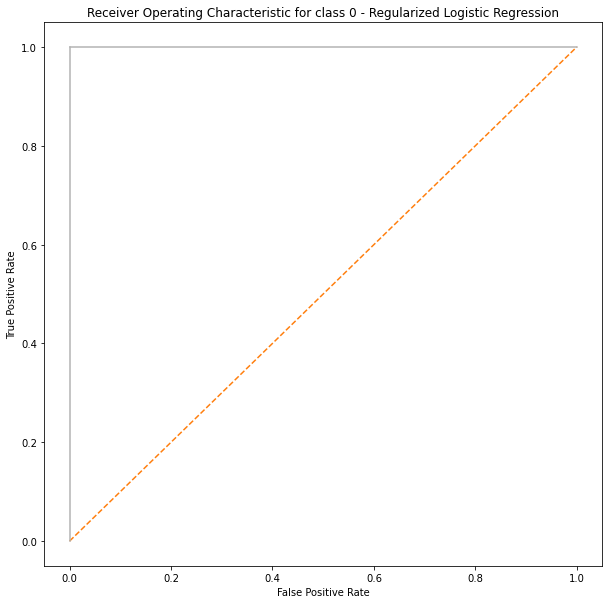

<Figure size 432x288 with 0 Axes>

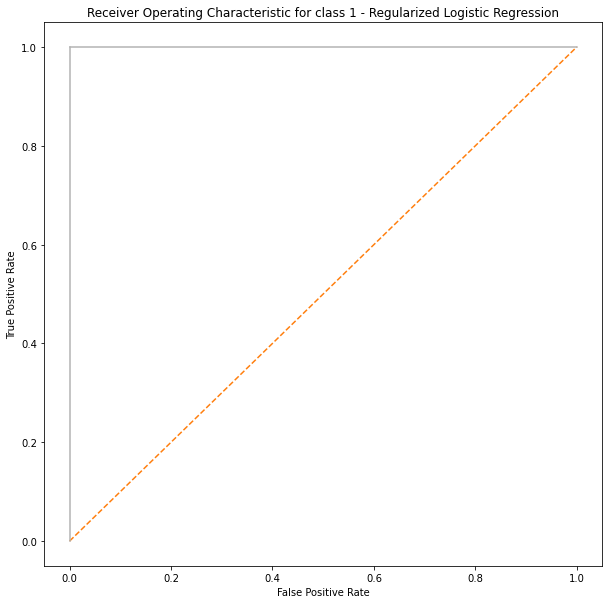

<Figure size 432x288 with 0 Axes>

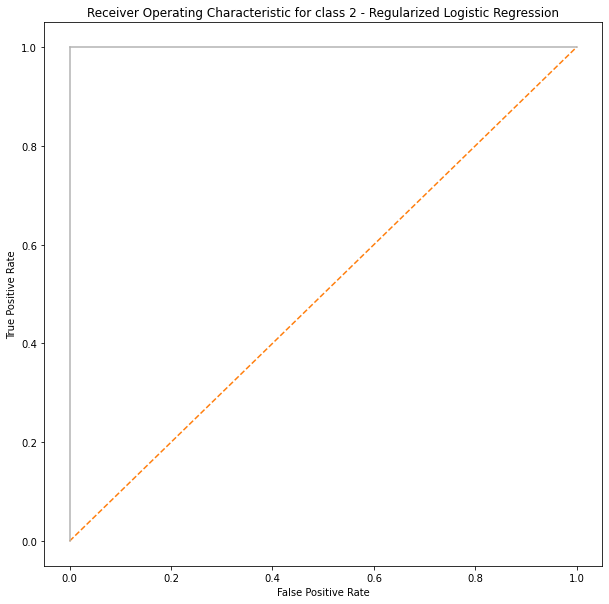

<Figure size 432x288 with 0 Axes>

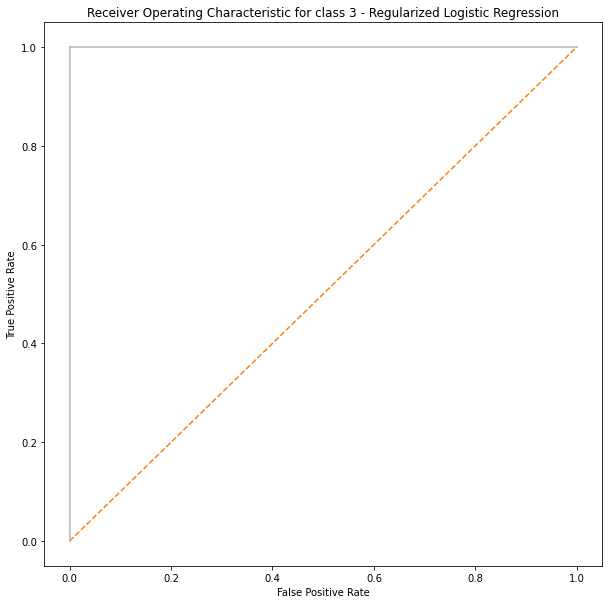

<Figure size 432x288 with 0 Axes>

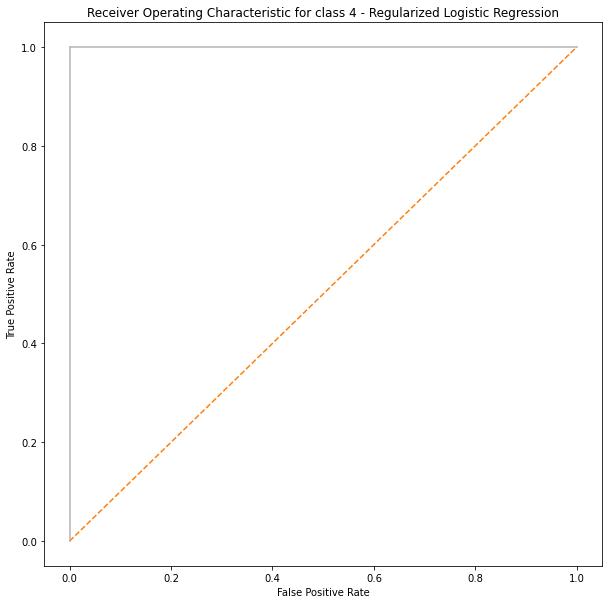

<Figure size 432x288 with 0 Axes>

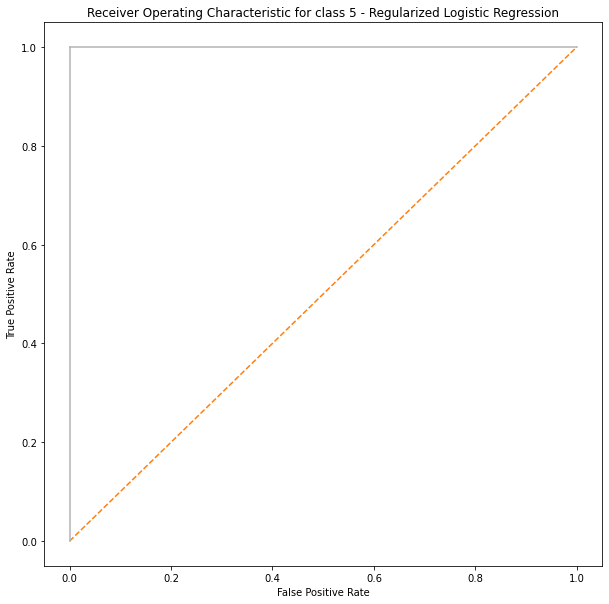

<Figure size 432x288 with 0 Axes>

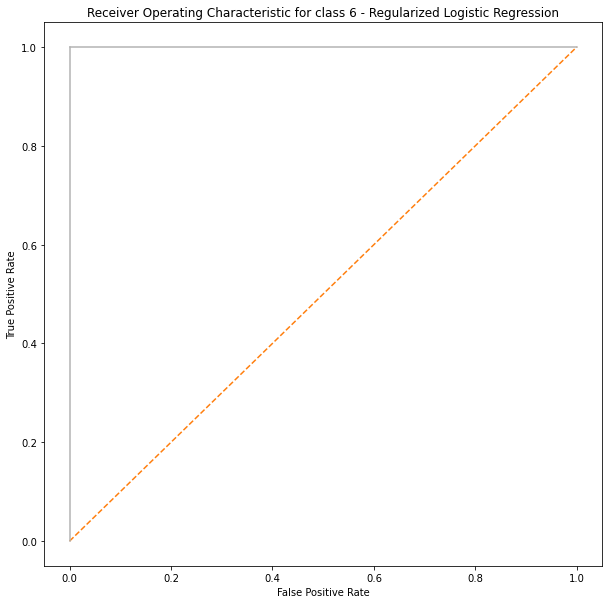

In [27]:
y = label_binarize(y, classes=[0,1,2,3,4,5,6])
n_classes = 7

# splitting 90% of data into training data and 10% to validation and test data
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,random_state=1,test_size=0.1)
# splitting test and validation data equally
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,random_state=1,test_size=0.5)

# Logistic Regression ROC
clf = OneVsRestClassifier(LogisticRegression(n_jobs=4))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.subplots(1, figsize=(10,10))
    plt.title(f'Receiver Operating Characteristic for class {i} - Regularized Logistic Regression')
    plt.plot(fpr[i], tpr[i])
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

<Figure size 432x288 with 0 Axes>

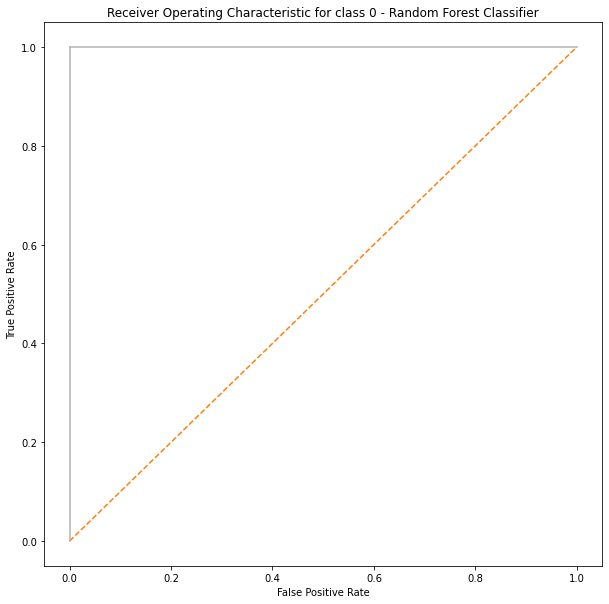

<Figure size 432x288 with 0 Axes>

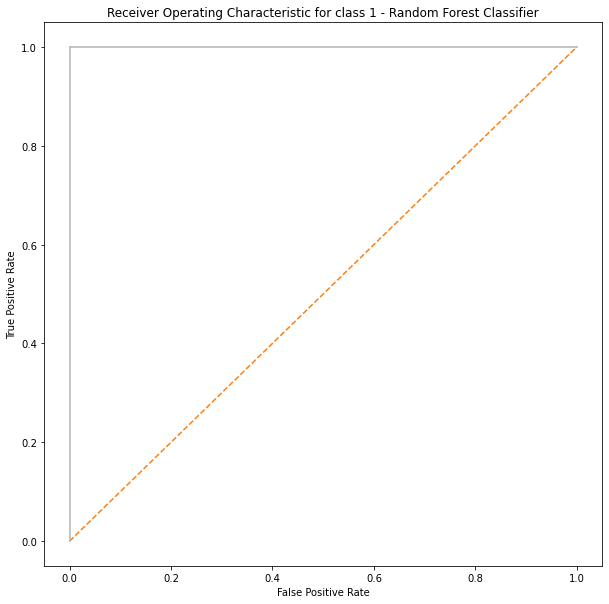

<Figure size 432x288 with 0 Axes>

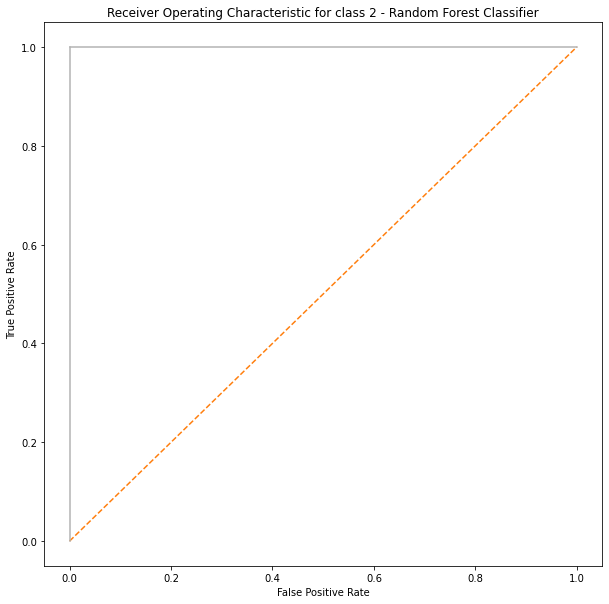

<Figure size 432x288 with 0 Axes>

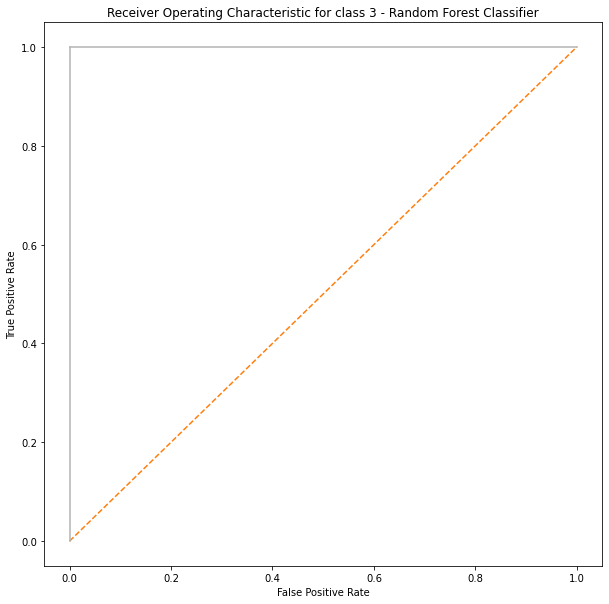

<Figure size 432x288 with 0 Axes>

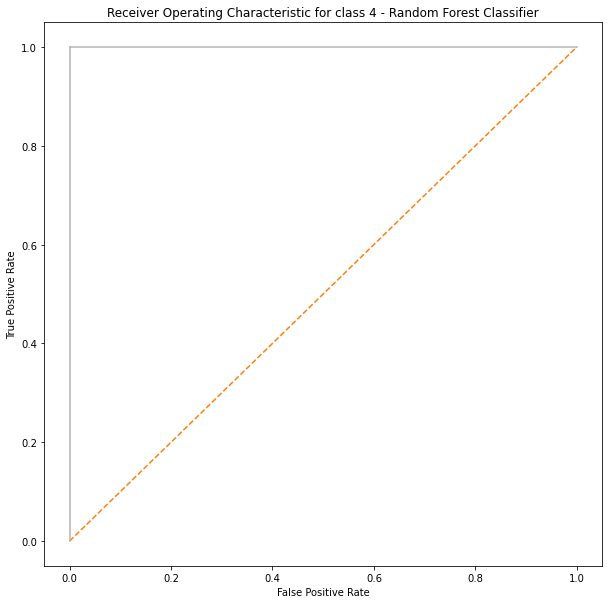

<Figure size 432x288 with 0 Axes>

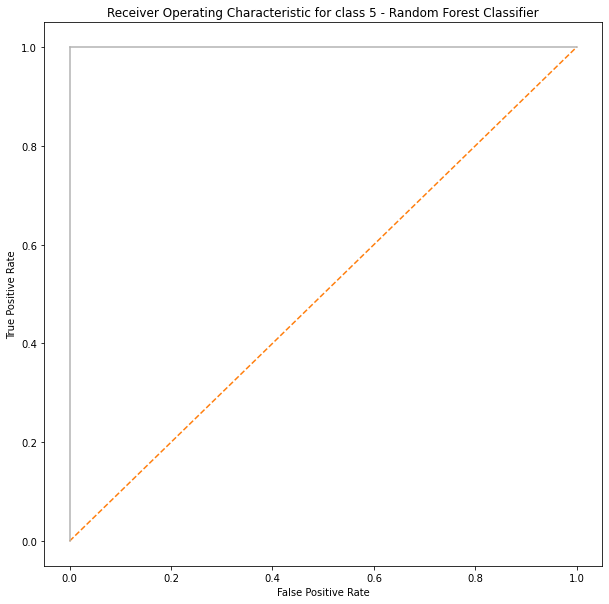

<Figure size 432x288 with 0 Axes>

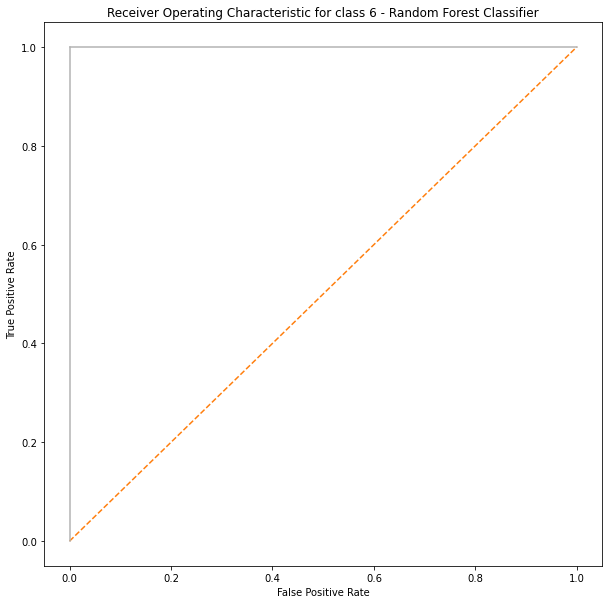

In [28]:
# Random Forest classifier ROC

clf = OneVsRestClassifier(RandomForestClassifier(bootstrap=True,random_state=9,warm_start=True,n_jobs=4))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.subplots(1, figsize=(10,10))
    plt.title(f'Receiver Operating Characteristic for class {i} - Random Forest Classifier')
    plt.plot(fpr[i], tpr[i])
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()